# Load images

/home/rotakagui/projects/Lseg/ADE20K/ADE20K/images/training/ADE_train_00000001.jpg 
 /home/rotakagui/projects/Lseg/ADE20K/ADE20K/annotations_semseg150_relabeled/training/ADE_train_00000001.png


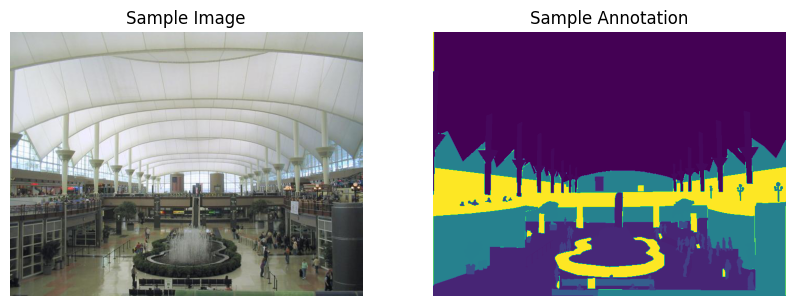

In [19]:
import os
from matplotlib import pyplot as plt
from PIL import Image

def check(adress):
    if os.path.isdir(adress):
        print(f'directory {adress} exists')
    else:
        print(f'DIRECTORY {adress} DOES NOT EXISTS')

    

# set up adresses
dir_data = "/home/rotakagui/projects/Lseg/ADE20K/ADE20K"
dir_annotations = os.path.join(dir_data, 'annotations_semseg150_relabeled/training')
dir_images = os.path.join(dir_data, 'images/training')

training_image_names = [os.path.join(dir_images, file) for file in os.listdir(dir_images) if os.path.isfile(os.path.join(dir_images, file))]
training_annotation_names = [os.path.join(dir_annotations, file) for file in os.listdir(dir_annotations) if os.path.isfile(os.path.join(dir_annotations, file))]

training_image_names.sort()
training_annotation_names.sort()

# Load one image from each array
sample_image_path = training_image_names[0]
sample_annotation_path = training_annotation_names[0]

print(sample_image_path,"\n", sample_annotation_path)


# Open the images
sample_image = Image.open(sample_image_path)
sample_annotation = Image.open(sample_annotation_path)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Sample Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sample_annotation)
plt.title("Sample Annotation")
plt.axis("off")

plt.show()

# Exploring ViT from Torch

In [20]:
import torch
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torchvision import transforms
from PIL import Image

# Load the pretrained ViT model
weights = ViT_B_16_Weights.IMAGENET1K_V1
model = vit_b_16(weights=weights)
model.eval()

# Preprocess the image
transform = weights.transforms()
image_path = sample_image_path  # Replace with your image path
sample_image = Image.open(image_path).convert('RGB')
input_tensor = transform(sample_image).unsqueeze(0)  # Add batch dimension
print('at the beginning after transforming the image, we have the size ',input_tensor.shape)



at the beginning after transforming the image, we have the size  torch.Size([1, 3, 224, 224])


In [21]:
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [22]:
with torch.no_grad():
    embedded_patches = model._process_input(input_tensor)
    print(embedded_patches.shape)


torch.Size([1, 196, 768])
